Madde1

İmport ve Datasetler yükleniyor.
Min-MaxNormalizasyonu ve Z-Score Normalizasyonlarını uygulanıyor.

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler


In [94]:
# Veri setini yükle
data = pd.read_csv("DataMakineOgrenmesi.csv")


In [95]:
# Veri setinden ilk 10 kaydı getiriyorum
print(data.head(10))

   Number of times pregnant.  \
0                          6   
1                          1   
2                          8   
3                          1   
4                          0   
5                          5   
6                          3   
7                         10   
8                          2   
9                          8   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test.  \
0                                                148                           
1                                                 85                           
2                                                183                           
3                                                 89                           
4                                                137                           
5                                                116                           
6                                                 78                           
7      

In [96]:
# Veri setini incele
print(data.head())
print(data.info())
print(data.describe())

   Number of times pregnant.  \
0                          6   
1                          1   
2                          8   
3                          1   
4                          0   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test.  \
0                                                148                           
1                                                 85                           
2                                                183                           
3                                                 89                           
4                                                137                           

   Diastolic blood pressure (mm Hg).  Triceps skinfold thickness (mm).  \
0                                 72                                35   
1                                 66                                29   
2                                 64                                 0   
3                             

In [97]:
# Eksik verileri kontrol et
print(data.isnull().sum())

Number of times pregnant.                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test.    0
Diastolic blood pressure (mm Hg).                                            0
Triceps skinfold thickness (mm).                                             0
2-Hour serum insulin (mu U/ml).                                              0
Body mass index (weight in kg/(height in m)^2).                              0
Diabetes pedigree function.                                                  0
Age (years).                                                                 0
Class variable (0 or 1).                                                     0
dtype: int64


Min-Max Normalizasyonu

In [98]:
# Özellikleri ayır
features = data.drop("Class variable (0 or 1).", axis=1)

# Min-Max normalizasyonu için scaler oluştur
scaler = MinMaxScaler()

# Veriyi normalleştir
normalized_features = scaler.fit_transform(features)

# Normalleştirilmiş veriyi DataFrame'e dönüştür
normalized_data = pd.DataFrame(normalized_features, columns=features.columns)

# Sonuçları kontrol et
print(normalized_data.head())

   Number of times pregnant.  \
0                   0.352941   
1                   0.058824   
2                   0.470588   
3                   0.058824   
4                   0.000000   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test.  \
0                                           0.743719                           
1                                           0.427136                           
2                                           0.919598                           
3                                           0.447236                           
4                                           0.688442                           

   Diastolic blood pressure (mm Hg).  Triceps skinfold thickness (mm).  \
0                           0.590164                          0.353535   
1                           0.540984                          0.292929   
2                           0.524590                          0.000000   
3                           0.

Z-Score Normalizasyonu


In [99]:
# Z-Score normalizasyonu için scaler oluştur
scaler = StandardScaler()

# Veriyi normalleştir
normalized_features = scaler.fit_transform(features)

# Normalleştirilmiş veriyi DataFrame'e dönüştür
normalized_data = pd.DataFrame(normalized_features, columns=features.columns)

# Sonuçları kontrol et
print(normalized_data.head())

   Number of times pregnant.  \
0                   0.639947   
1                  -0.844885   
2                   1.233880   
3                  -0.844885   
4                  -1.141852   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test.  \
0                                           0.848324                           
1                                          -1.123396                           
2                                           1.943724                           
3                                          -0.998208                           
4                                           0.504055                           

   Diastolic blood pressure (mm Hg).  Triceps skinfold thickness (mm).  \
0                           0.149641                          0.907270   
1                          -0.160546                          0.530902   
2                          -0.263941                         -1.288212   
3                          -0.

In [100]:
# Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak veriyi ayır
X = data.drop(columns=['Class variable (0 or 1).'])
y = data['Class variable (0 or 1).']

In [101]:
# Eğitim ve test veri setlerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Öznitelik ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model oluşturma ve eğitme
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Modeli değerlendirme
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test veri seti doğruluk skoru:", accuracy)

Test veri seti doğruluk skoru: 0.7575757575757576


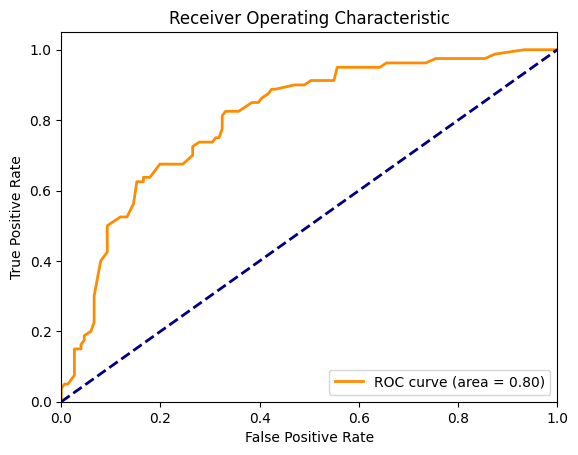

In [102]:
# Test veri seti üzerinde tahmin edilen olasılıkları al
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# ROC eğrisi ve AUC değerini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Madde 2

Naive Bayes modeli, test verisi üzerinde kabul edilebilir bir performans göstermiştir.Bu sonuçlar, modelin iyileştirilmesi için ek parametre ayarlamaları veya farklı sınıflandırma yöntemlerinin denenmesi gerektiğini göstermektedir.


In [103]:
# Naive Bayes sınıflandırıcı modelini oluştur ve eğit
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred = nb_model.predict(X_test)

# Sınıflandırma raporunu görüntüle
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))



Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



Madde 3

En iyi k değeri aşağıdaki  range 1-21 değerlendirmesinde 13 çıktı, eğer 1-6 için alınırsa 2 olarak sonuç üretmektedir.

In [104]:
# En iyi k değerini bulma kod rutini
best_k = None
best_accuracy = 0

for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, knn_predictions)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("En iyi k değeri:", best_k)

# En iyi k değeri ile K-en yakın komşuluk modelini eğit
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

# Test seti üzerinde modelin performansını değerlendir
knn_predictions = knn_model.predict(X_test)

# Sınıflandırma raporunu görüntüle
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, knn_predictions))

En iyi k değeri: 13

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



Madde 4

Aşağıdaki sonuçlar, modelin iyi bir doğruluk oranına sahip olduğunu, ancak özellikle pozitif sınıf için duyarlılık ve kesinliğin daha da iyileştirilebileceğini göstermektedir. Yanlış negatif ve yanlış pozitif oranlarının azaltılması için modelin daha da optimize edilmesi gerekebilir.

Multi-Layer Perceptron (MLP): Yapay sinir ağı tabanlı bir sınıflandırma modelidir. İnsan beyninin sinir ağı yapısını taklit eden bir yapay sinir ağı modelidir.

Support Vector Machines (SVM) : Sınıflandırma ve regresyon problemlerinde kullanılan bir makine öğrenimi algoritmasıdır. SVM, özellikle doğrusal ve doğrusal olmayan sınıflandırma problemlerinde etkilidir.


In [105]:
# MLP sınıflandırıcısı modelini oluştur ve eğit
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred_mlp = mlp_model.predict(X_test)

# MLP sınıflandırıcısı sonuçlarını raporla
print("MLP Sınıflandırıcı Raporu:")
print(classification_report(y_test, y_pred_mlp))

# SVM sınıflandırıcısı modelini oluştur ve eğit
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred_svm = svm_model.predict(X_test)

# SVM sınıflandırıcısı sonuçlarını raporla
print("\nSVM Sınıflandırıcı Raporu:")
print(classification_report(y_test, y_pred_svm))




MLP Sınıflandırıcı Raporu:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.61      0.55      0.58        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231


SVM Sınıflandırıcı Raporu:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



In [106]:
# MLP modelini eğit
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

# SVM modelini eğit
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Test seti üzerinde her iki modelin performansını değerlendir
mlp_predictions = mlp_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

print("MLP için rapor:")
print(classification_report(y_test, mlp_predictions))

print("SVM için rapor:")
print(classification_report(y_test, svm_predictions))

MLP için rapor:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       151
           1       0.67      0.40      0.50        80

    accuracy                           0.72       231
   macro avg       0.70      0.65      0.65       231
weighted avg       0.71      0.72      0.70       231

SVM için rapor:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
